# Calculating Elastic Properties of a Rock

In [1]:
import numpy as np
from drp_template.math import bound, GPa2Pa, Pa2GPa
from drp_template.image import plot_effective_modulus

## Task 1: Calculating Elastic Properties of a Rock

In this rock analysis task, we have information about different mineral phases and their respective elastic properties. The phases considered are Quartz, Feldspar, Dolomite, and Calcite.

The bulk modulus of these minerals, representing their resistance to changes in volume under pressure, is provided. For Quartz, it is 36 GPa, for Feldspar 75 GPa, for Dolomite 95 GPa, and for Calcite 76 GPa. Similarly, the shear modulus, indicating the material's response to shear stress, is given as 45 GPa for Quartz, 25 GPa for Feldspar, 45 GPa for Dolomite, and 32 GPa for Calcite.

The fractional composition of these minerals in the rock is also known. The fractions are specified as 50% for Quartz, 30% for Feldspar, 10% for Dolomite, and 10% for Calcite.

Additionally, the rock has a porosity of 0.1, indicating the fraction of the rock's volume that is not filled with solid minerals.

1. What are the Voigt and Reuss boundaries?
2. Calculate the corresponding Hashin-Shtrikman bounds.
3. Plot the Voigt, Reuss, Voigt-Reuss-Hill and upper and lower Hashin-Shtrikman bounds in a Figure (Pa vs Fraction).

In [2]:
# The the constants
phase = ('Quartz', 'Feldspar', 'Dolomite', 'Calcite')

K_quartz = 36
K_Feldspar = 75
K_Dolomite = 95
K_Calcite = 76

U_quartz = 45
U_Feldspar = 25
U_Dolomite = 45
U_Calcite = 32

f_quartz = 0.5
f_Feldspar = 0.3
f_Dolomite = 0.1
f_Calcite = 0.1

bulk_minerals = np.array([K_quartz, K_Feldspar, K_Dolomite, K_Calcite])
shear_minerals = np.array([U_quartz, U_Feldspar, U_Dolomite, U_Calcite])
fractions = np.array([f_quartz, f_Feldspar, f_Dolomite, f_Calcite])

porosity = 0.1

In [8]:
# Calculate the Voigt and Reuss boundaries
k_voigt, k_reuss, u_voigt, u_reuss, k_avg, u_avg = bound(type='voigt-reuss', fractions=fractions, k=bulk_minerals, u=shear_minerals)

print('k_bulk (Voigt: upper; Reuss: lower bounds):', [k_voigt, k_reuss])
print('u (Voigt: upper; Reuss: lower bounds):', [u_voigt, u_reuss])
print('k_avg and u_avg (Hill average for voigt-reuss):', [k_avg, u_avg])

k_bulk (Voigt: upper; Reuss: lower bounds): [57.6, 49.364896073903004]
u (Voigt: upper; Reuss: lower bounds): [37.7, 35.13909224011713]
k_avg and u_avg (Hill average for voigt-reuss): [53.4824480369515, 36.41954612005857]


In [4]:
# Calculate the Hashin-Shtrikman boundaries
k_hs_upper, k_hs_lower, u_hs_upper, u_hs_lower, k_avg, u_avg = bound(type='hashin-shtrikman', fractions=fractions, k=bulk_minerals, u=shear_minerals)

print('k_bulk (upper and lower HS bounds):', [k_hs_upper, k_hs_lower])
print('u (upper and lower HS bounds):', [u_hs_upper, u_hs_lower])
print('k_avg and u_avg (Simple arithmetic avg):', [k_avg, u_avg])

k_bulk (upper and lower HS bounds): [53.4943542959695, 52.322529040417876]
u (upper and lower HS bounds): [36.68125248449039, 36.26235796368775]
k_avg and u_avg (Simple arithmetic avg): [52.90844166819369, 36.47180522408907]


AttributeError: module 'matplotlib.pyplot' has no attribute 'PercentFormatter'

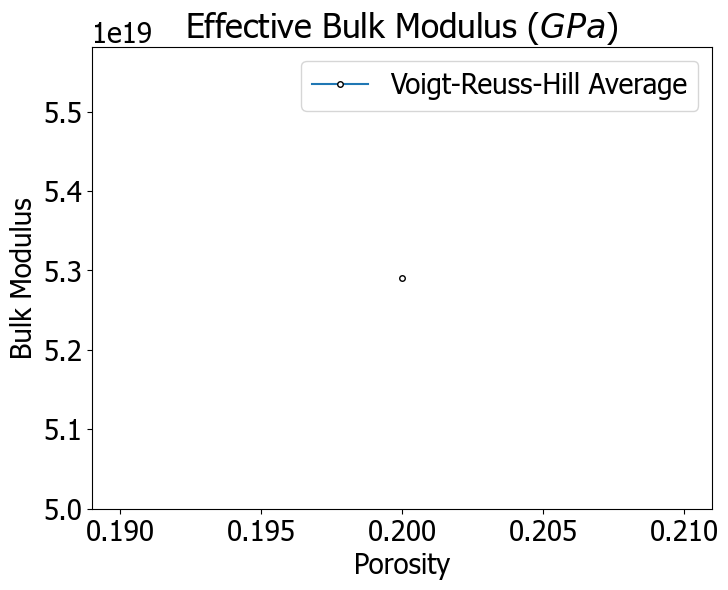

In [6]:
# Plot the elastic rock properties (Pa vs Fraction plot)
# Convert GPa in Pa
k_voigt, k_reuss, u_voigt, u_reuss = GPa2Pa(k_voigt, k_reuss, u_voigt, u_reuss)
k_hs_upper, k_hs_lower, u_hs_upper, u_hs_lower, k_avg, u_avg = GPa2Pa(k_hs_upper, k_hs_lower, u_hs_upper, u_hs_lower, k_avg, u_avg)

phi = np.array([0.2])
data = {
    'voigt': k_voigt, 
    'reuss': k_reuss,
    'hs_upper': k_hs_upper,
    'hs_lower': k_hs_lower,
    'avg': k_avg
}


plot_effective_modulus(phi, modulus='bulk', data=data, types='avg', dark_mode=False)

## Task 2
In this material analysis task, we have information about different components and their corresponding elastic properties. Specifically, we are examining Quartz, Calcite, and Water.

For Quartz, the bulk modulus (K) is 36 GPa, and the shear modulus (U) is 45 GPa. The fractional composition of Quartz in the material is 80%.

For Calcite, the bulk modulus is 75 GPa, and the shear modulus is 31 GPa. The fractional composition of Calcite in the material is 20%.

Additionally, Water is considered as part of the material. The bulk modulus of Water is 2.2 GPa, and the shear modulus is practically negligible (close to 0). The fractional composition of Water in the material is 27%, which is equivalent to the porosity of the material.

The overall porosity of the material is specified as 27%.

Calculate the Voigt-Reuss or Hashin-Shtrikman bounds for 

In [ ]:
K_quartz = 36 # GPa
U_quartz = 45 # GPa
f_quartz = 0.8
K_calcite = 75 # GPa
U_calcite = 31 # GPa
f_calcite = 0.2
K_water = 2.2 # GPa
U_water = 1e-20# GPa
f_water = 0.27 # f_water is equal to porosity
porosity = f_water

fractions = np.array([porosity, (1-porosity)*f_quartz, (1-porosity)*f_calcite])
bulk_array = GPa2Pa(np.array([K_water, K_quartz, K_calcite]))
shear_array = GPa2Pa(np.array([U_water, U_quartz, U_calcite]))

# fractions = np.array([f_quartz, f_calcite])
# bulk_array = np.array([K_quartz, K_calcite])
# shear_array = np.array([U_quartz, U_calcite])

print(f"fractions: {fractions}")
print(bulk_array)

Calculate the Voigt (upper) and Reuss (lower) bounds.

In [ ]:
k_voigt, k_reuss, u_voigt, u_reuss, k_avg, u_avg = bound(type='voigt-reuss', fractions=fractions, k=bulk_array, u=shear_array)

# convert Pa to GPa
k_voigt, k_reuss, u_voigt, u_reuss, k_avg, u_avg = Pa2GPa(k_voigt, k_reuss, u_voigt, u_reuss, k_avg, u_avg)
print('k_bulk (Voigt: upper; Reuss: lower bounds):', [k_voigt, k_reuss])
print('u (Voigt: upper; Reuss: lower bounds):', [u_voigt, u_reuss])
print('k_avg and u_avg (Hill average for voigt-reuss):', [k_avg, u_avg])

Calculate the upper and lower Hashin-Shtrikman bounds.

In [ ]:
k_hs_upper, k_hs_lower, u_hs_upper, u_hs_lower, k_avg, u_avg = bound(type='hashin-shtrikman', fractions=fractions, k=bulk_array, u=shear_array)

# convert Pa to GPa
k_hs_upper, k_hs_lower, u_hs_upper, u_hs_lower, k_avg, u_avg = Pa2GPa(k_hs_upper, k_hs_lower, u_hs_upper, u_hs_lower, k_avg, u_avg)
print('k_bulk (upper and lower HS bounds):', [k_hs_upper, k_hs_lower])
print('u (upper and lower HS bounds):', [u_hs_upper, u_hs_lower])
print('k_avg and u_avg (Simple arithmetic avg):', [k_avg, u_avg])

## Trial-And-Error

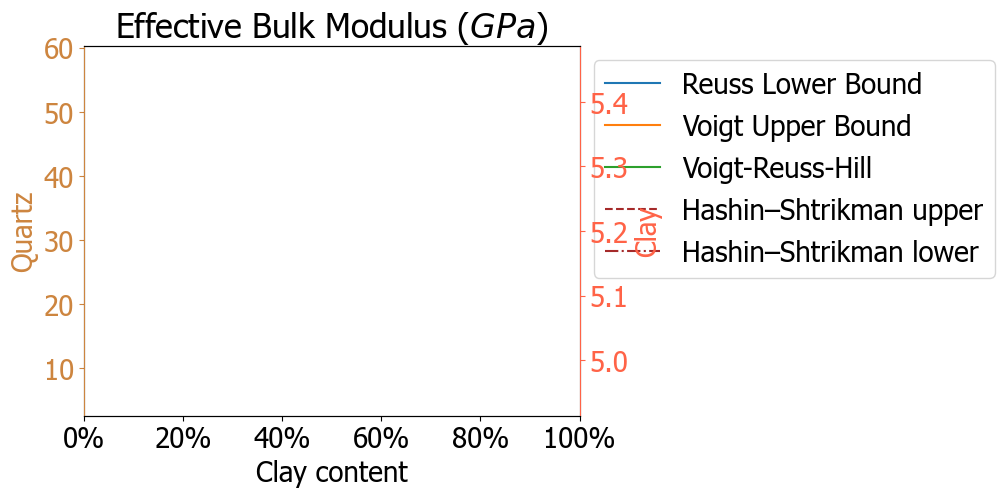

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

K_Reuss = 49
K_Voigt = 57.6
K_Voigt_Reuss_Hill = 53
K_up_HS = 5.3
K_low_HS = 5.2
phi = 0.2
# K_Reuss = k_reuss
# K_Voigt = k_voigt
# K_Voigt_Reuss_Hill = k_avg
# K_up_HS = k_hs_upper
# K_low_HS = k_hs_lower

fig, ax1 = plt.subplots()
color1 = 'peru'
color2 = 'tomato'
ax1.set_title("Effective Bulk Modulus ($GPa$)")
ax1.plot(phi, K_Reuss, label="Reuss Lower Bound")
ax1.plot(phi, K_Voigt, label="Voigt Upper Bound")
ax1.plot(phi, K_Voigt_Reuss_Hill, label="Voigt-Reuss-Hill")
ax1.plot(phi, K_up_HS, label="Hashin–Shtrikman upper", color="brown", linestyle="dashed")
ax1.plot(phi, K_low_HS, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")

ax2 = ax1.twinx()
ax2.plot(phi, K_low_HS, label="Hashin–Shtrikman lower", color="brown", linestyle="-.")
ax2.set_ylabel("Clay", color=color2)
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
ax1.tick_params(axis='y', colors=color1)
ax2.spines['left'].set_color(color1)
ax1.set_xlabel("Clay content")
ax1.set_ylabel("Quartz", color=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.spines['right'].set_color(color2)

ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1.00))  # convert x-axis into percent
plt.xlim([0, 1])

plt.show()
